In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv(r"C:\Users\nikit\OneDrive\Desktop\capstone.csv")

In [5]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [34]:
data.shape

(2200, 8)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [36]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [37]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [38]:
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [39]:
data.duplicated().sum()

0

In [40]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<Axes: >

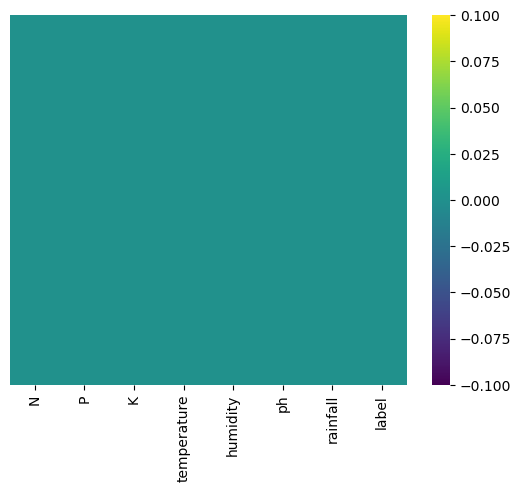

In [41]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

In [42]:
data['temperature']=data['temperature'].fillna(data['temperature'].mean())
data['ph'].ffill(axis=0, inplace=True)
data['P'].bfill(axis=0, inplace=True)
data['humidity']=data['humidity'].fillna(data['humidity'].mode())
data['K'].bfill(axis=0, inplace=True)
data['N'].ffill(axis=0, inplace=True)
data['rainfall']=data['rainfall'].fillna(data['rainfall'].mode())


In [43]:
data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [44]:
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

# Data Visualization

C:\Users\nikit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


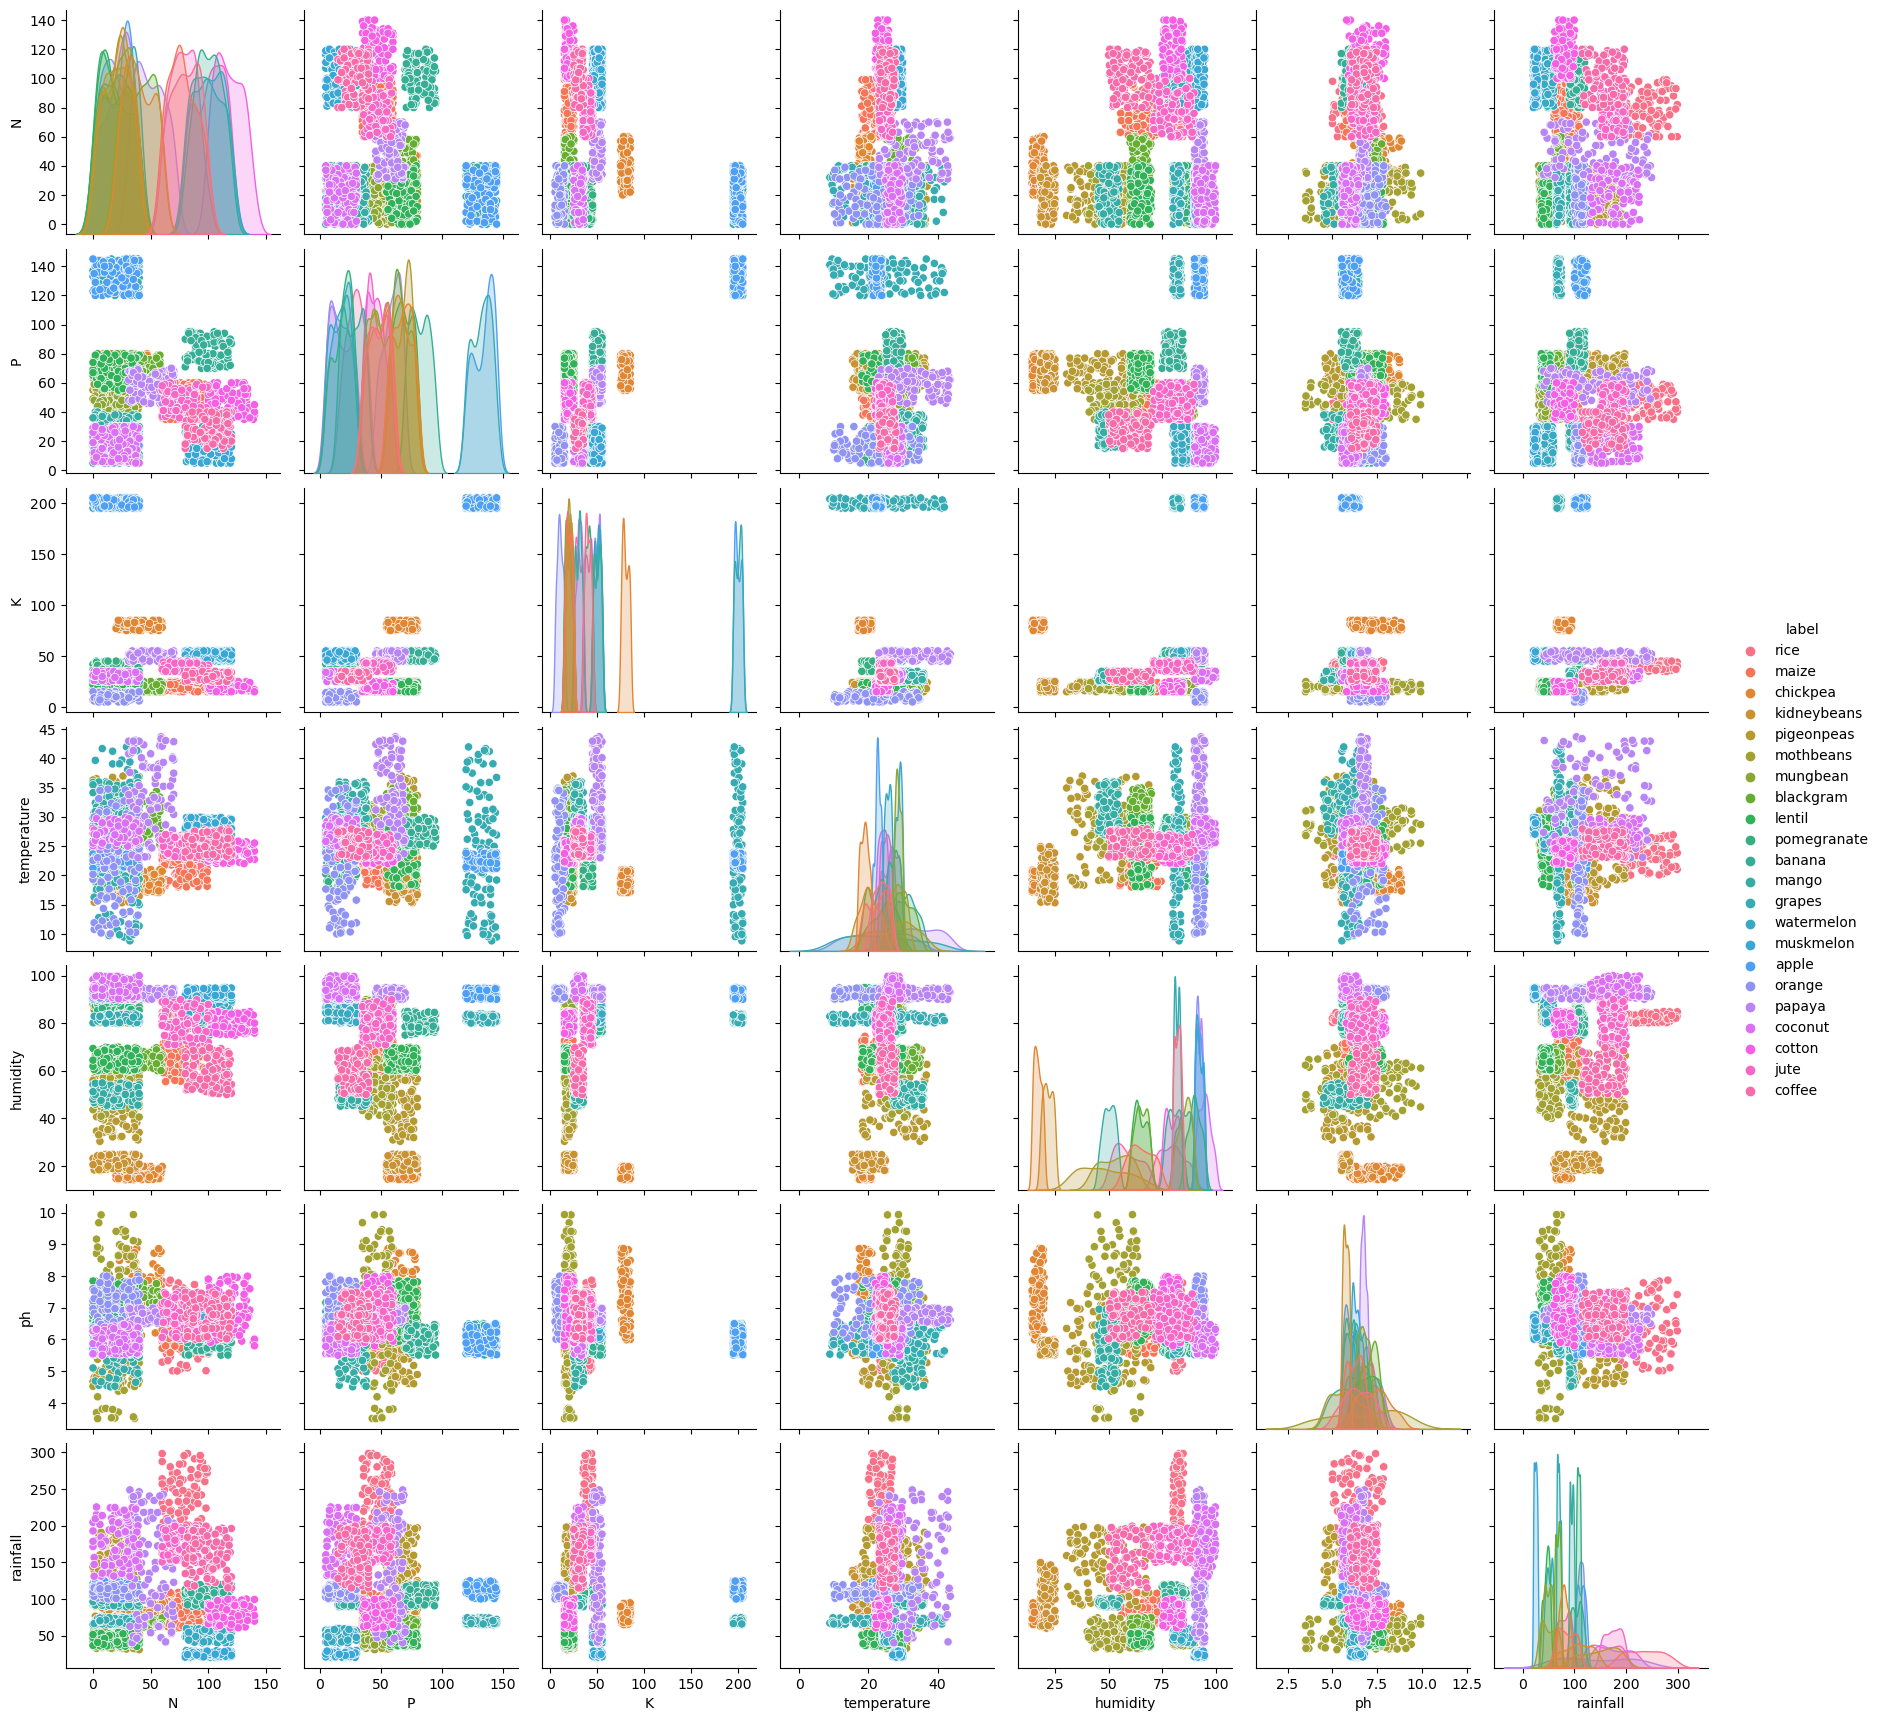

In [45]:
sns.pairplot(data=data,hue='label')

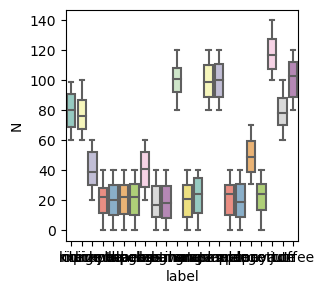

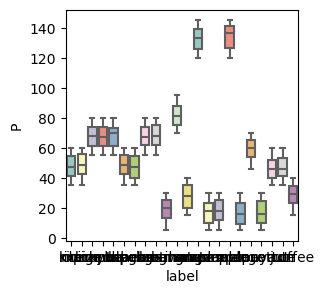

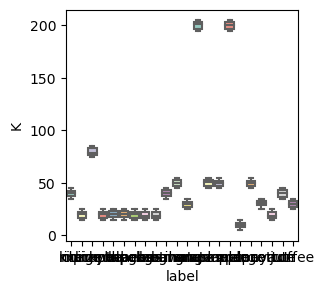

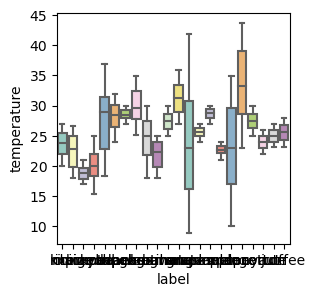

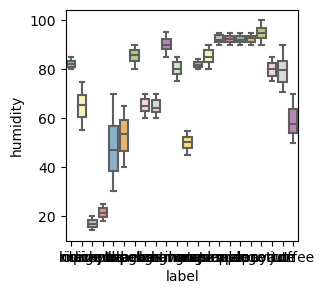

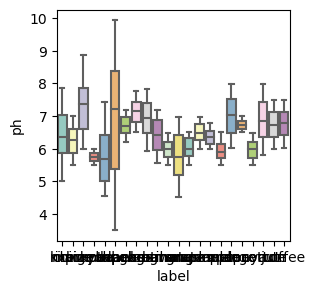

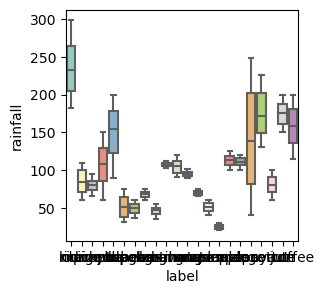

In [127]:
# List of columns to create violin plots for
columns_to_plot =["N","P","K","temperature","humidity","ph","rainfall"]

# Create a loop to generate violin plots
for column in columns_to_plot:
    plt.figure(figsize=(3, 3))  # Set the figure size
    sns.boxplot(x='label', y=column, data=data, palette='Set3')

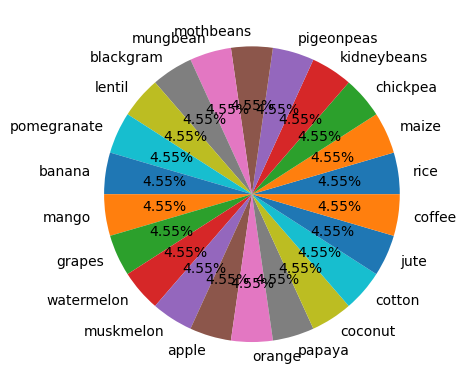

In [46]:
plt.pie(data['label'].value_counts(),labels=data['label'].unique(),autopct='%.2f%%')
plt.show()

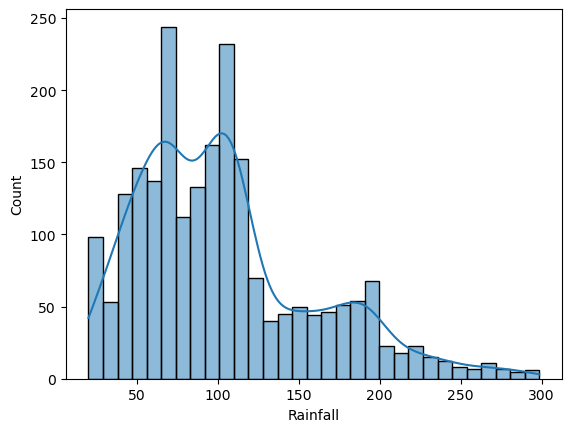

In [47]:
sns.histplot(data.rainfall,kde=True)
plt.xlabel('Rainfall')
plt.ylabel('Count')
plt.show()

In this chart, We get inferences of the Highest and lowest levels of rainfall

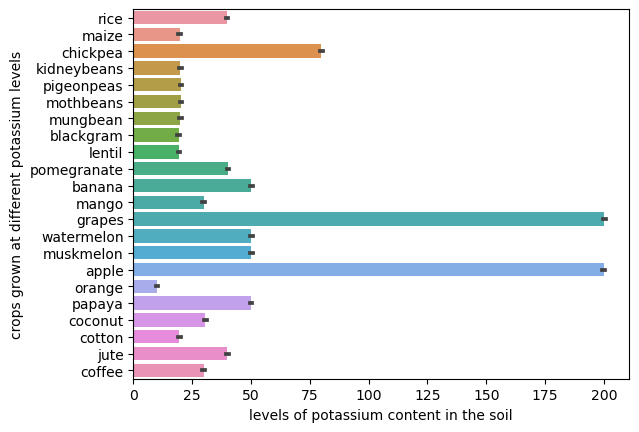

In [48]:
sns.barplot(data=data,x='K',y='label')
plt.xlabel('levels of potassium content in the soil')
plt.ylabel('crops grown at different potassium levels')
plt.show()

Here we can see that some crops such as the chickpea, grapes and apple need high level of potassium in the soil to grow

Text(0.5, 1.0, 'Phosphorous and Potassium levels in soil with higher rainfall')

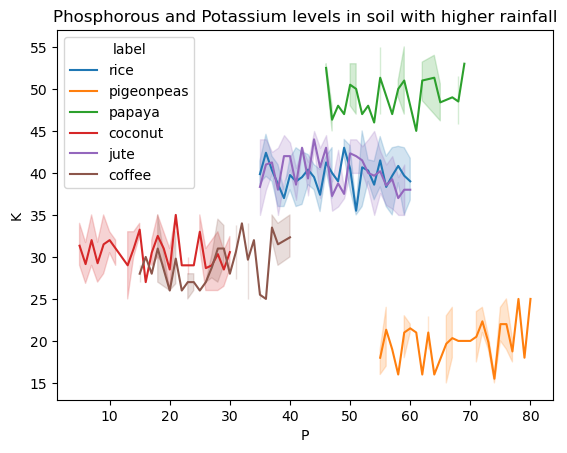

In [49]:
sns.lineplot(x='P',y='K',data=data[(data['rainfall']>150)],hue='label')
plt.title('Phosphorous and Potassium levels in soil with higher rainfall')

A line plot showing the relationship between Phosphorous and Potassium levels in the soil for data where rainfall is greater than 150. The above mentioned crops under the label column are grown in the condition where the rainfall is high and the levels of Phosphorous and Potassium range between 20-55

Text(0.5, 1.0, 'Distribution of temperature')

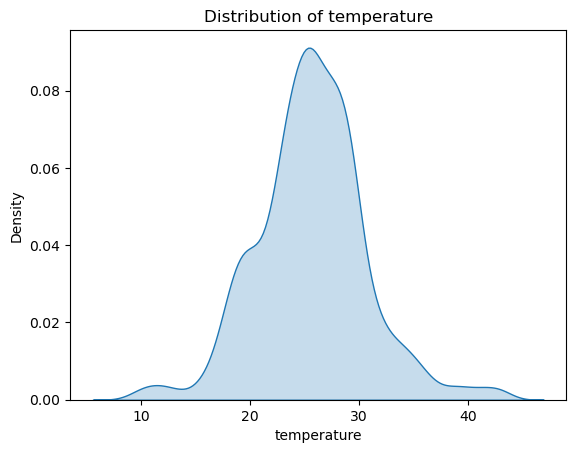

In [50]:
sns.kdeplot(data=data,x='temperature',fill=True)
plt.title('Distribution of temperature')

<Axes: xlabel='humidity', ylabel='P'>

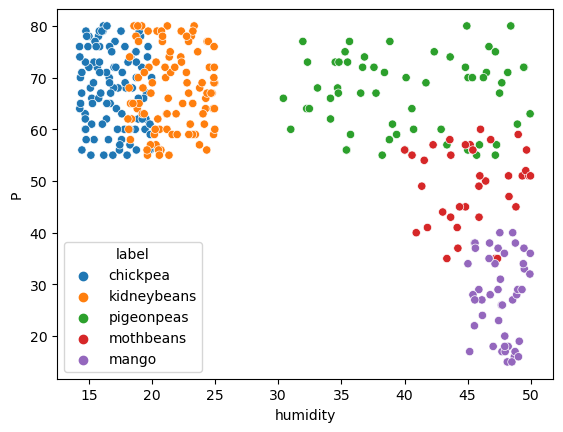

In [51]:
sns.scatterplot(data=data[data['humidity']<50],y='P',x='humidity',hue='label')

A scatter plot that displays the relationship between humidity and ph level for the subset of data where humidity is less than 50 where Soils with pH values below pH 7 are acidic in nature.

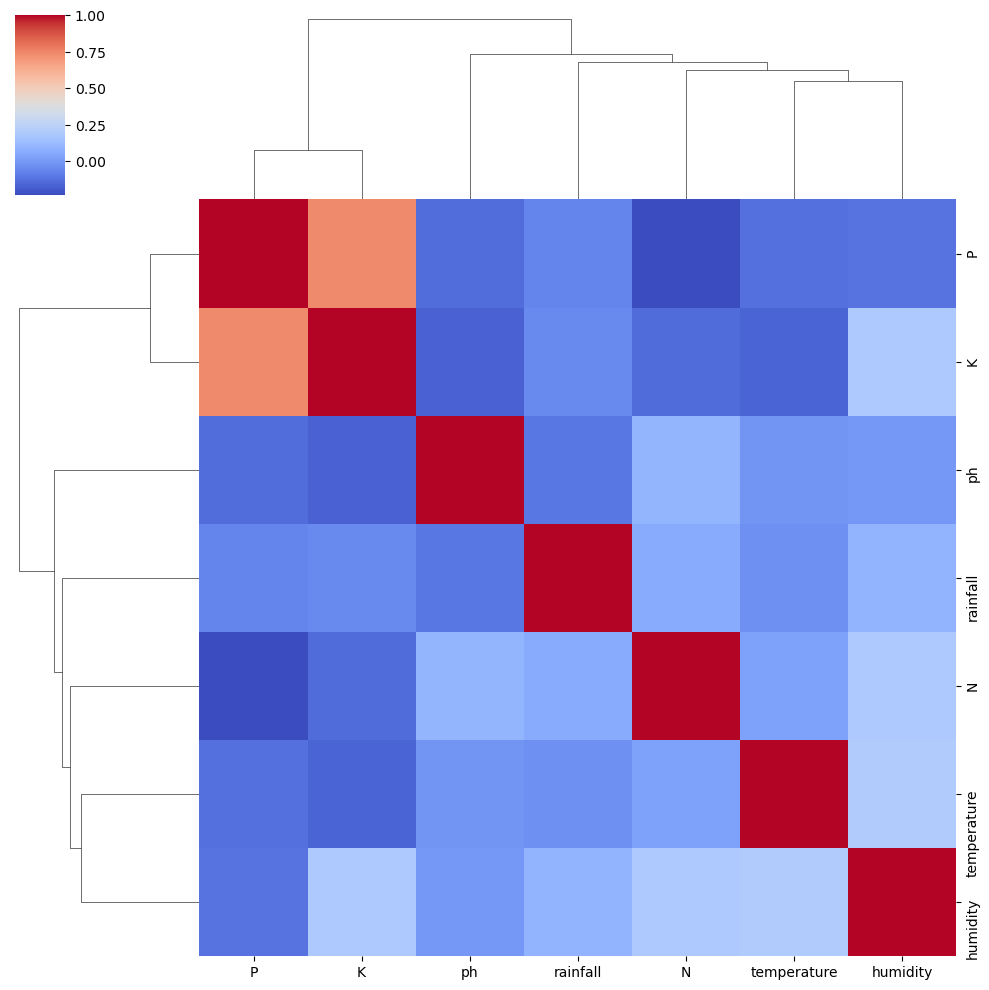

In [115]:
#Creating a cluster map
sns.clustermap(scaled_cols.corr(), cmap='coolwarm')

a hierarchically-clustered heatmap

<Axes: xlabel='humidity', ylabel='label'>

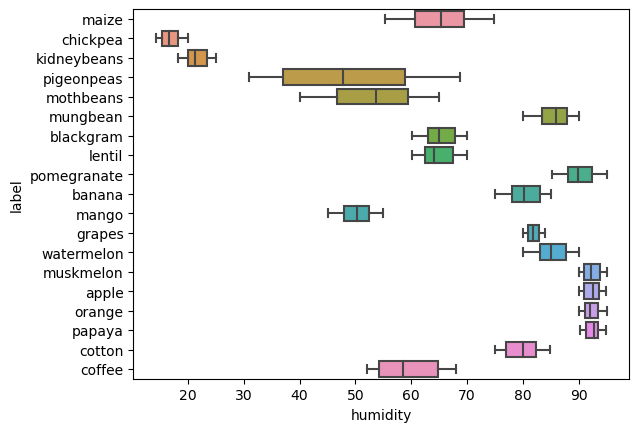

In [53]:
sns.boxplot(x='humidity',y='label',data=data[data['rainfall']<120])

This boxplot helps in comparing the distribution and variability of humidity across the crop types under condition where rainfall is less than 120

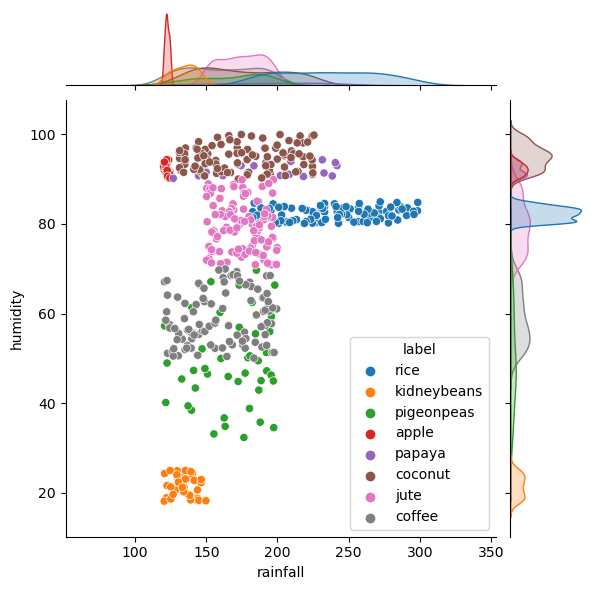

In [7]:
sns.jointplot(x='rainfall',y='humidity',data=data[(data['temperature']<30) & (data['rainfall']>120)],hue="label")

The above joint plot displays a scatter plot of Rainfall against Humidity for the data where the temperature is less than 30 and rainfall is greater than 120. Additionally, it includes plots on the top and right side of the plot, showing the distributions of Rainfall and Humidity separately.

In [55]:
from sklearn.preprocessing import StandardScaler
numerical_cols=["N","P","K","temperature","humidity","ph","rainfall"]
scaler=StandardScaler()
scaled_cols=pd.DataFrame(scaler.fit_transform(data[numerical_cols]),columns=scaler.get_feature_names_out(numerical_cols))

In [56]:
scaled_cols

,N,P,K,temperature,humidity,ph,rainfall
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373
...,...,...,...,...,...,...,...
2195,1.529390,-0.587134,-0.318922,0.228814,-0.227709,0.401395,1.352437
2196,1.312641,-1.163269,-0.417666,0.355720,-0.666947,-0.494413,0.445183
2197,1.827421,-0.617457,-0.358420,-0.293218,-0.191235,-0.138120,1.271418
2198,1.800327,-0.647780,-0.279425,0.129612,-0.869518,0.373904,0.431545


In [57]:
X=scaled_cols
Y=data['label']

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=20)

# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [63]:
regressor=LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)


In [64]:
regressor.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [65]:
Y_predicted=regressor.predict(X_test)

In [66]:
Train_score=regressor.score(X_test,Y_test)
Train_score

0.9659090909090909

In [67]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty':['l1', 'l2'],
    'C' : [0.1, 0.5, 1, 5, 10]
}
grid = GridSearchCV(estimator = regressor, param_grid=param_grid, cv = 5)
grid.fit(X_train, Y_train)

C:\Users\nikit\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nikit\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nikit\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nikit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000,
                                          multi_class='multinomial'),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [68]:
best_param = grid.best_params_
best_model = grid.best_estimator_

In [69]:
print('Best hyperparameters: ',best_param)

Best hyperparameters:  {'C': 10, 'penalty': 'l2'}


Confusion Matrix:  [[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  

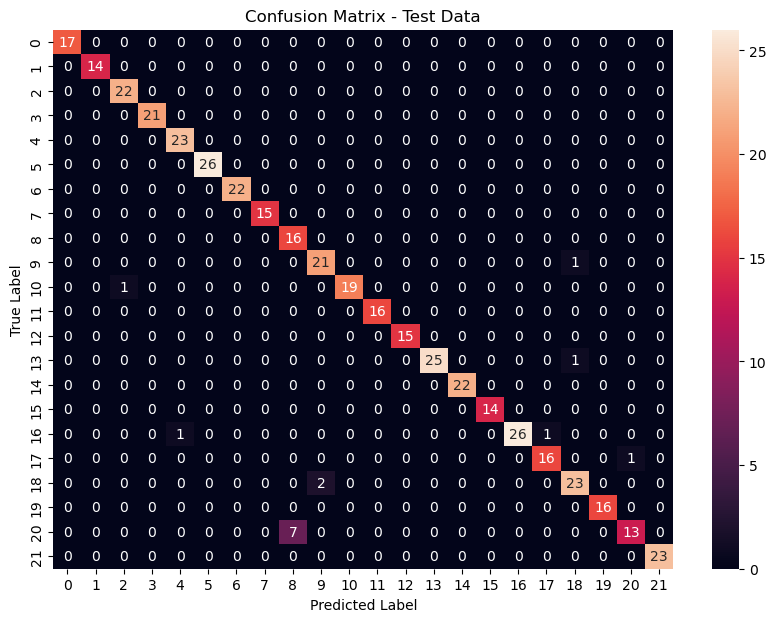

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_predicted)
print('Confusion Matrix: ',cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt = '.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [81]:
pred_train = regressor.predict(X_train)
pred_test = regressor.predict(X_test)

In [83]:
from sklearn import metrics
print(metrics.classification_report(Y_test,pred_test))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        17
      banana       1.00      1.00      1.00        14
   blackgram       0.96      1.00      0.98        22
    chickpea       1.00      1.00      1.00        21
     coconut       0.96      1.00      0.98        23
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        15
        jute       0.70      1.00      0.82        16
 kidneybeans       0.91      0.95      0.93        22
      lentil       1.00      0.95      0.97        20
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        15
   mothbeans       1.00      0.96      0.98        26
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        14
      orange       1.00      0.93      0.96        28
      papaya       0.94    

# k Nearest Neighbor

In [111]:
from sklearn.neighbors import KNeighborsClassifier
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, Y_train)
knn_acc=knn.score(X_test, Y_test)
pred=knn.predict(X_train)

In [112]:
knn_acc

0.9659090909090909

In [149]:
print(metrics.classification_report(Y_train,pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        83
      banana       1.00      1.00      1.00        86
   blackgram       0.95      0.99      0.97        78
    chickpea       1.00      1.00      1.00        79
     coconut       1.00      1.00      1.00        77
      coffee       1.00      0.99      0.99        74
      cotton       0.96      1.00      0.98        78
      grapes       1.00      1.00      1.00        85
        jute       0.88      1.00      0.94        84
 kidneybeans       0.99      1.00      0.99        78
      lentil       0.94      0.96      0.95        80
       maize       1.00      0.96      0.98        84
       mango       0.99      1.00      0.99        85
   mothbeans       0.99      0.92      0.95        74
    mungbean       1.00      1.00      1.00        78
   muskmelon       1.00      1.00      1.00        86
      orange       1.00      0.99      0.99        72
      papaya       1.00    

In [150]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_classifier.fit(X_train, Y_train)  
y_pred = knn_classifier.predict(X_test)  
accuracy = accuracy_score(Y_test, y_pred)  
print('accuracy:',accuracy)
print(classification_report(Y_test, y_pred))  


accuracy: 0.9659090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        17
      banana       1.00      1.00      1.00        14
   blackgram       0.92      1.00      0.96        22
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        23
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        15
        jute       0.71      0.94      0.81        16
 kidneybeans       0.92      1.00      0.96        22
      lentil       0.90      0.95      0.93        20
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        15
   mothbeans       1.00      0.88      0.94        26
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        14
      orange       1.00      0.93      0.96        2

Confusion Matrix:  [[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  

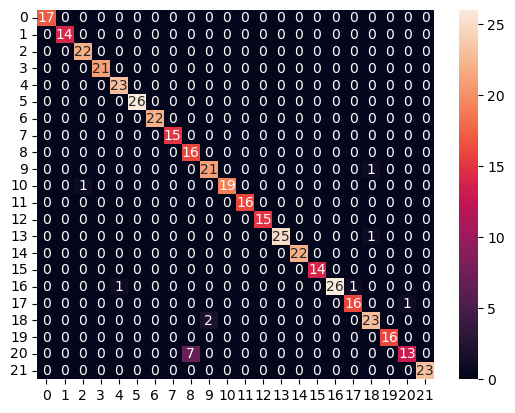

In [151]:
cm = confusion_matrix(Y_test,Y_predicted)
sns.heatmap(cm, annot=True, fmt = '.3g')
print('Confusion Matrix: ',cm)
plt.show()

# Support Vector Classifier

In [96]:
from sklearn.svm import SVC

svc_linear = SVC(kernel = 'linear').fit(X_train,Y_train)
print("Linear Kernel Accuracy: ",svc_linear.score(X_test,Y_test))
svc=svc_linear.score(X_test,Y_test)
svc_r = SVC(kernel = 'rbf').fit(X_train,Y_train)
print("Rbf Kernel Accuracy: ", svc_r.score(X_test,Y_test))

svc_poly = SVC(kernel = 'poly').fit(X_train,Y_train)
print("Poly Kernel Accuracy: ", svc_poly.score(X_test,Y_test))

Linear Kernel Accuracy:  0.9772727272727273
Rbf Kernel Accuracy:  0.975
Poly Kernel Accuracy:  0.9318181818181818


In [97]:
print(metrics.classification_report(Y_train,pred_svc))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        83
      banana       1.00      1.00      1.00        86
   blackgram       0.99      1.00      0.99        78
    chickpea       1.00      1.00      1.00        79
     coconut       1.00      1.00      1.00        77
      coffee       1.00      0.99      0.99        74
      cotton       0.99      1.00      0.99        78
      grapes       1.00      1.00      1.00        85
        jute       0.89      0.95      0.92        84
 kidneybeans       1.00      1.00      1.00        78
      lentil       0.98      0.99      0.98        80
       maize       1.00      0.99      0.99        84
       mango       1.00      1.00      1.00        85
   mothbeans       0.99      0.96      0.97        74
    mungbean       1.00      1.00      1.00        78
   muskmelon       1.00      1.00      1.00        86
      orange       1.00      1.00      1.00        72
      papaya       1.00    

In [143]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


param_grid = {
    'C': [0.1, 1, 10],            # Regularization parameter
    'kernel': ['linear', 'rbf','poly','sigmoid'],  # Kernel type
      
}
grid = GridSearchCV(estimator = svc_linear, param_grid=param_grid, cv = 5)
grid.fit(X_train, Y_train)
best_parameter = grid.best_params_
best_model = grid.best_estimator_
print('hyperparameters: ',best_parameter)

hyperparameters:  {'C': 1, 'kernel': 'linear'}


In [144]:
y_pred = best_model.predict(X_test)

In [145]:
acc=accuracy_score(Y_test,y_pred)
print("Accuracy:",acc)

Accuracy: 0.9772727272727273


In [146]:
#classification report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        17
      banana       1.00      1.00      1.00        14
   blackgram       0.96      1.00      0.98        22
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        23
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        15
        jute       0.70      1.00      0.82        16
 kidneybeans       0.92      1.00      0.96        22
      lentil       1.00      0.95      0.97        20
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        15
   mothbeans       1.00      1.00      1.00        26
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        14
      orange       1.00      1.00      1.00        28
      papaya       1.00    

# Randomized Search CV

In [147]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'C': [0.1, 1, 10],            # Regularization parameter
    'kernel': ['linear', 'rbf','poly','sigmoid'],  # Kernel type
      
}
random=RandomizedSearchCV(svc_linear, param_grid, cv=5)
random.fit(X_train,Y_train)
best_parameters = random.best_params_
best_model = random.best_estimator_
print('Hyperparameters:',best_parameters)
y_pred = best_model.predict(X_test)
acc=accuracy_score(Y_test,y_pred)
print("Accuracy:",acc)
print(classification_report(Y_test,y_pred))

Hyperparameters: {'kernel': 'rbf', 'C': 10}
Accuracy: 0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        17
      banana       1.00      1.00      1.00        14
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        23
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        15
        jute       0.71      0.94      0.81        16
 kidneybeans       0.92      1.00      0.96        22
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        15
   mothbeans       1.00      1.00      1.00        26
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        14
      or

# Decision Tree

In [131]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=45).fit(X_train, Y_train)
accuracydt=clf.score(X_test,Y_test)
clf_pred=clf.predict(X_train)
accuracydt

0.9818181818181818

In [132]:
print(metrics.classification_report(Y_train,clf_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        83
      banana       1.00      1.00      1.00        86
   blackgram       1.00      1.00      1.00        78
    chickpea       1.00      1.00      1.00        79
     coconut       1.00      1.00      1.00        77
      coffee       1.00      1.00      1.00        74
      cotton       1.00      1.00      1.00        78
      grapes       1.00      1.00      1.00        85
        jute       1.00      1.00      1.00        84
 kidneybeans       1.00      1.00      1.00        78
      lentil       1.00      1.00      1.00        80
       maize       1.00      1.00      1.00        84
       mango       1.00      1.00      1.00        85
   mothbeans       1.00      1.00      1.00        74
    mungbean       1.00      1.00      1.00        78
   muskmelon       1.00      1.00      1.00        86
      orange       1.00      1.00      1.00        72
      papaya       1.00    

# Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier
clfr = RandomForestClassifier(max_depth=4,n_estimators=100,random_state=42).fit(X_train, Y_train)
clf_Score=clfr.score(X_test, Y_test)
clf_p=clfr.predict(X_train)
print('RF Accuracy on training set: {:.2f}'.format(clf.score(X_train, Y_train)))
print('RF Accuracy on test: {:.2f}'.format(clf.score(X_test, Y_test)))

RF Accuracy on training set: 1.00
RF Accuracy on test: 0.98


In [101]:
print(metrics.classification_report(Y_train,clf_p))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        83
      banana       1.00      1.00      1.00        86
   blackgram       0.75      1.00      0.86        78
    chickpea       1.00      1.00      1.00        79
     coconut       1.00      1.00      1.00        77
      coffee       0.99      1.00      0.99        74
      cotton       0.99      1.00      0.99        78
      grapes       1.00      1.00      1.00        85
        jute       0.86      0.99      0.92        84
 kidneybeans       1.00      1.00      1.00        78
      lentil       0.82      1.00      0.90        80
       maize       1.00      0.99      0.99        84
       mango       1.00      1.00      1.00        85
   mothbeans       1.00      0.41      0.58        74
    mungbean       1.00      1.00      1.00        78
   muskmelon       1.00      1.00      1.00        86
      orange       1.00      0.97      0.99        72
      papaya       1.00    

# Gradient Boosting 

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier().fit(X_train, Y_train)
acc=grad.score(X_test,Y_test)
print('Gradient Boosting accuracy : {}'.format(grad.score(X_test,Y_test)))

Gradient Boosting accuracy : 0.990909090909091


In [103]:
# Create a dictionary to store accuracy values for each model
df = {
    "Model": ["lOr score","Gradient Boosting accuracy", "RF Accuracy", "Decision Tree acc", "k-NN","SVM"],
    "Accuracy": [Train_score, acc, clf_Score, accuracydt, knn_acc,svc]
}

# Create a Pandas DataFrame 
accuracy_df = pd.DataFrame(df)

# Display the DataFrame as a table
accuracy_df

,Model,Accuracy
0,lOr score,0.965909
1,Gradient Boosting accuracy,0.990909
2,RF Accuracy,0.938636
3,Decision Tree acc,0.981818
4,k-NN,0.965909
5,SVM,0.977273
